# Using Historical Data to Predict Batting Success: Step 3 - Hall Of Fame Modelling

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Notebook Series

Just a word about the presentation of this project code.

The code is organized into a series of locally executed Jupyter notebooks, organized by step and needing to be executed in sequence. This is `harr2890_project_step3_hof_modelling`, the third of XXXXX notebooks.  TODO

## *Step 3 - Exploration and Modelling for a Hall of Fame Approach*

word words word TODO


## Environment Setup

Import and establish environment for our work, including showing all dataframe column values.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Pre-Conditions

Steps 1-2 must be run completely before running this notebook.

The `data` folder must exist with the following prepared data files:
- `./data/step2_pre_2000.csv`
- `./data/step2_from_2000.csv`

##  Loading Prepared Data Files

In [2]:
pre_2000_csv = "./data/step2_pre_2000.csv"
pre_2000 = pd.read_csv(pre_2000_csv)
pre_2000

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429,1
1,abreubo01,Bobby Abreu,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741,0
2,adairje01,Jerry Adair,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451,0
3,adamsbo03,Bobby Adams,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052,0
4,adamssp01,Sparky Adams,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,0.285714,0.353005,0.342606,0.695611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,zaungr01,Gregg Zaun,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31,0.251648,0.388077,0.344091,0.732168,0
1510,zeileto01,Todd Zeile,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,0.264624,0.423346,0.346140,0.769487,0
1511,zernigu01,Gus Zernial,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511,0
1512,zimmedo01,Don Zimmer,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478,0


In [3]:
from_2000_csv = "./data/step2_from_2000.csv"
from_2000 = pd.read_csv(from_2000_csv)
from_2000

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,adamsma01,Matt Adams,10,2614,2421,297,624,130,6,118,399,165,643,12,0,16,0.257745,0.462619,0.306427,0.769046,0
1,alonsyo01,Yonder Alonso,10,3773,3362,390,872,181,2,100,426,366,648,16,1,28,0.259369,0.403629,0.332450,0.736078,0
2,altuvjo01,Jose Altuve,11,6346,5778,883,1777,340,29,164,639,443,753,54,26,45,0.307546,0.461578,0.359810,0.821389,0
3,andinro01,Robert Andino,10,1491,1344,153,313,58,1,18,97,113,313,6,21,7,0.232887,0.317708,0.293878,0.611586,0
4,andruel01,Elvis Andrus,13,7620,6863,953,1864,328,50,79,673,547,1043,50,103,56,0.271601,0.368498,0.327435,0.695933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,youngde03,Delmon Young,10,4371,4108,473,1162,218,11,109,566,179,784,40,1,43,0.282863,0.420886,0.316018,0.736904,0
301,younger03,Eric Young Jr.,10,1926,1725,253,422,67,22,13,112,147,350,23,26,5,0.244638,0.331594,0.311579,0.643173,0
302,youngmi02,Michael Young,14,8612,7918,1136,2375,441,60,185,1030,575,1235,22,25,72,0.299949,0.440894,0.346105,0.786999,0
303,zimmery01,Ryan Zimmerman,16,7402,6654,963,1846,417,22,284,1061,646,1384,31,1,69,0.277427,0.474752,0.340946,0.815698,0


## Extract X and y Data from `pre_2000`

`pre_2000` has 1514 records. This is the data we will be focusing on for training and validating the model.

`pre_2000` has 21 columns, the first two (`ID` and `Player`) are for identification purposes and last column (`Inductee`) is our label. This leaves 18 feature columns for consideration. Also, note that four of the columns (the calculated statistics) are based on other features in the data.

We can extract those 18 feature columns into `X`:

In [4]:
num = pre_2000.shape[1]
X = pre_2000[pre_2000.columns[2:num-1]]
X

,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS
0,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429
1,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741
2,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451
3,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052
4,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,0.285714,0.353005,0.342606,0.695611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31,0.251648,0.388077,0.344091,0.732168
1510,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,0.264624,0.423346,0.346140,0.769487
1511,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511
1512,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478


We capture the column/feature names into `X_features`:

In [5]:
X_features = X.columns.values.tolist()
X_features

['Number of Seasons',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF',
 'AVG',
 'SLG',
 'OBP',
 'OPS']

And, finally, modify the format of `X` to be an array ready for working with `scikit-learn`.

In [6]:
X = X.values
X

array([[2.30000000e+01, 1.36660000e+04, 1.21210000e+04, ...,
        5.55152215e-01, 3.74276292e-01, 9.29428507e-01],
       [1.80000000e+01, 1.00810000e+04, 8.48000000e+03, ...,
        4.74764151e-01, 3.94977169e-01, 8.69741320e-01],
       [1.30000000e+01, 4.31400000e+03, 4.01900000e+03, ...,
        3.46852451e-01, 2.91598409e-01, 6.38450859e-01],
       ...,
       [1.10000000e+01, 4.36100000e+03, 3.94000000e+03, ...,
        4.88324873e-01, 3.32186281e-01, 8.20511154e-01],
       [1.20000000e+01, 3.52300000e+03, 3.21800000e+03, ...,
        3.71970168e-01, 2.90507600e-01, 6.62477767e-01],
       [1.30000000e+01, 5.73700000e+03, 5.14400000e+03, ...,
        4.65590980e-01, 3.52879581e-01, 8.18470561e-01]])

Similarly for `y`, we'll extract the label column:

In [7]:
y = pre_2000[['Inductee']]
y

,Inductee
0,1
1,0
2,0
3,0
4,0
...,...
1509,0
1510,0
1511,0
1512,0


Extract the label name:

In [8]:
y_label_name = y.columns.values.tolist()
y_label_name

['Inductee']

Then, finally, prepare `y` for use with `scikit-learn`.

In [9]:
y = pre_2000[y_label_name[0]].values
y

array([1, 0, 0, ..., 0, 0, 0])

Before moving on, let's take a look at the breakdown between the number of Hall of Fame inductees in this dataset versus those who are not in the Hall of Fame.

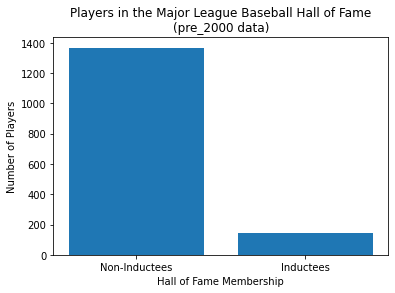

In [10]:
import matplotlib.pyplot as plt

data = [len(pre_2000[pre_2000['Inductee']==0]), len(pre_2000[pre_2000['Inductee']==1])]
plt.title("Players in the Major League Baseball Hall of Fame\n(pre_2000 data)")
plt.xlabel("Hall of Fame Membership")
plt.ylabel("Number of Players")
plt.bar(['Non-Inductees','Inductees'], data)

plt.show()

As one might expect, we can see that there are far more players not in the Hall of Fame than those who are. It is a special honour, indeed.

### X and y `from_2000` data

Before going any further, part of the approach for this project is also to look at more recent player data, found in the `from_2000` dataset. So, let's extract values for `X_2000` and `y_2000` data for testing.

In [11]:
num = from_2000.shape[1]
X_2000 = from_2000[from_2000.columns[2:num-1]]
X_2000_features = X_2000.columns.values.tolist()
X_2000 = X_2000.values

y_2000 = pre_2000[['Inductee']]
y_2000_label_name = y_2000.columns.values.tolist()
y_2000 = pre_2000[y_label_name[0]].values

For later, we also want to isolate the names of players in the `from_2000` data for further testing.

In [12]:
from_2000_names = from_2000['Player']
from_2000_names

0          Matt Adams
1       Yonder Alonso
2         Jose Altuve
3       Robert Andino
4        Elvis Andrus
            ...      
300      Delmon Young
301    Eric Young Jr.
302     Michael Young
303    Ryan Zimmerman
304       Ben Zobrist
Name: Player, Length: 305, dtype: object

Also for later on, we have a function to print out the predicted names from the `from_2000` data, based on the `y` array of Hall of Fame predictions.

In [13]:
def print_hall_of_fame_predictions(y_predictions):
    predictions = []
    i = 0
    for pred in y_predictions:
        if pred == 1:
            predictions.append(i)
        i += 1
        
    if len(predictions) == 0:
        print("Empty player list.")
    else:
        for player in predictions:
            print(from_2000_names[player])

## Taking Steps Toward a Model

Using `pre_2000` for model training and validation. (We are reserving `from_2000`, with its 305 records, for aditional independent testing.)

`pre_2000` has 21 columns, the first two (`'ID'` and `'Player'`) are for identification purposes and last column (`'Inductee'`) is our label. This leaves 18 feature columns for consideration.

Also, note that four of the columns (the calculated statistics) are based on other features in the data. We may return to remove the calcuated statistics later on.

With so many dimensions, we should consider reducing dimensionality in order to avoid overfitting. 

### Model 1 (M1): Logistic Regression

Model 1 (M1) is a simple logistic regression approach, using all 18 features and scaling, but without dimension reduction.

We will start with logistic regression because this is a binary classification problem.

Model 1 (M1) Performance


/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


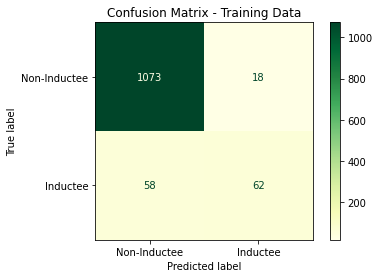

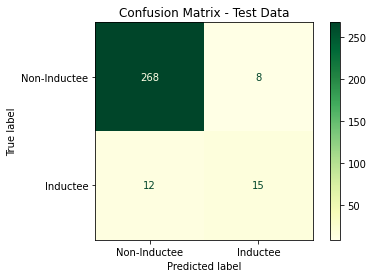

Accuracy of the model for training set: 0.937
Accuracy of the model for test set: 0.934

Precision of the model for training set: 0.775
Precision of the model for test set: 0.652

Recall of the model for training set: 0.517
Recall of the model for test set: 0.556

F1-measure of the model for training set: 0.620
F1-measure of the model for test set: 0.600



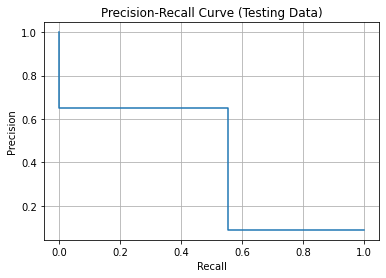

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

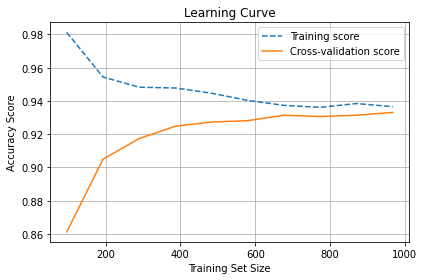

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line se

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210

/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-pa

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210

/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  wa

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py

/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line se

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line se

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210

/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210

/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

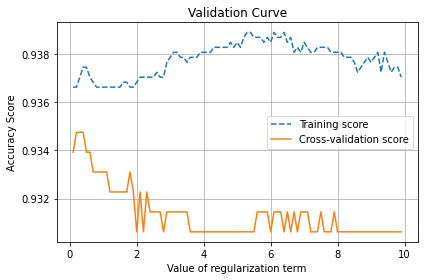

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# scaler = StandardScaler()
# X1 = scaler.fit_transform(X)
X1 = X

#### https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

#### Step 3: https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226


X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)

M1_clf = LogisticRegression(solver = 'newton-cg')
M1_clf.fit(X_train, y_train)
y_train_predict = M1_clf.predict(X_train)
y_test_predict = M1_clf.predict(X_test)


print("Model 1 (M1) Performance")


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# training
display = ConfusionMatrixDisplay.from_estimator(
    M1_clf,
    X_train,
    y_train,
    display_labels=['Non-Inductee', 'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Training Data")

plt.show()

# test
display = ConfusionMatrixDisplay.from_estimator(
    M1_clf,
    X_test,
    y_test,
    display_labels=['Non-Inductee', 'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Test Data")

plt.show()

from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train, y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test, y_test_predict))

from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train, y_train_predict))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test, y_test_predict))

from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train, y_train_predict))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test, y_test_predict))

from sklearn.metrics import f1_score
print('F1-measure of the model for training set: %.3f' % f1_score(y_train, y_train_predict))
print('F1-measure of the model for test set: %.3f\n' % f1_score(y_test, y_test_predict))

from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, y_test_predict)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve (Testing Data)")
plt.grid()
plt.show()


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    M1_clf, X_train, y_train, cv=5, scoring ='accuracy', train_sizes=np.linspace(.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean,  label="Cross-validation score")

plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


from sklearn.model_selection import validation_curve
param_range = np.arange(0.1,10,0.1)

train_scores, test_scores = validation_curve(
    M1_clf, X_train, y_train, param_name="C", param_range=param_range, cv=5, scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, '--',label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")

plt.grid()
plt.title("Validation Curve")
plt.xlabel("Value of regularization term")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [75]:
# Import cross-validate function from sckit-learn
from sklearn.model_selection import cross_validate
# Perform cross-validation with K=5 (cv=5) and "accuracy" as performance measure
cv_results = cross_validate(M1_clf, X1, y, cv=5, scoring ='accuracy')
# Store results
cv_scores = cv_results['test_score'] 
# Print cross-validation results
print("Cross-validation score for each of the folds: ", [float('{:.3f}'.format(x)) for x in cv_scores])
print("Mean cross-validation score (or cross-validation score): %0.3f (+/- %0.3f)" % (cv_scores.mean(), cv_scores.std() * 2))



/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210

Cross-validation score for each of the folds:  [0.934, 0.944, 0.941, 0.901, 0.954]
Mean cross-validation score (or cross-validation score): 0.935 (+/- 0.036)


/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


#### Interesting....

In [76]:
print_hall_of_fame_predictions(M1_clf.predict(X_2000))

Miguel Cabrera
Albert Pujols


At a quick glance, these metrics look good. The variance between the two sets of data is low but there is a problem.

*Recall* - the percentage of correctly identified values - is quite low, which causes the F1-Score to be low as well.

This begins to point to the challenge and among the bigger problems with this Hall of Fame approach. There are far more non-inductees than inductees in the Major League Baseball Hall of Fame. So, it is easy for the accuracy to be high because most people are not (and never will be) inductees to the Hall of Fame which means that accuracy on its own is a misleading metric.

### Model 2 (M2): Logistic Regression with PCA analysis for dimensionality reduction

Model 2 (M2) is also a logistic regression approach, but using Primary Component Analysis (PCA) for dimesionality reduction.

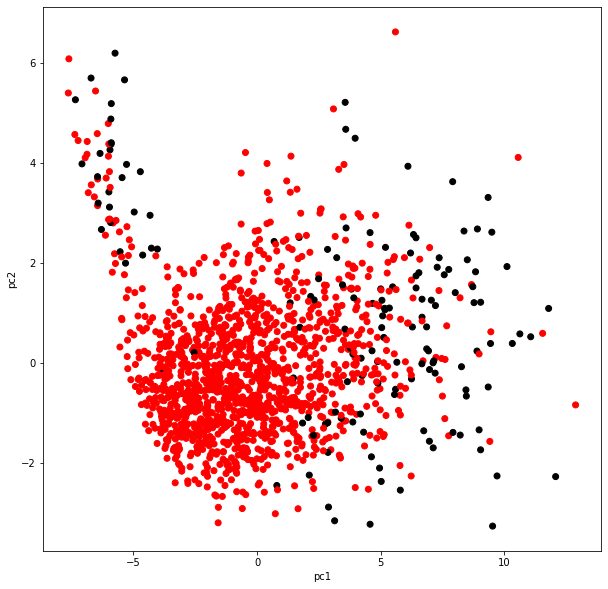

Text(0.5, 0, 'PC3')

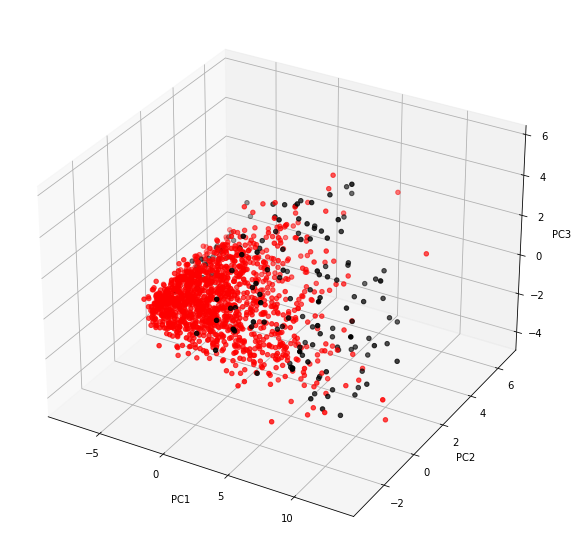

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

principal = PCA(n_components = 3)
principal.fit(X_scaled)
X2 = principal.transform(X_scaled)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)



plt.figure(figsize=(10, 10))
plt.scatter(X2[:,0], X2[:,1], c=y,cmap='flag')
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
 
axis = fig.add_subplot(111, projection='3d')
 
axis.scatter(X2[:,0], X2[:,1], X2[:,2], c=y,cmap='flag')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

Now, train the model after the PCA analysis and transformation.

Model 2 (M2) Performance


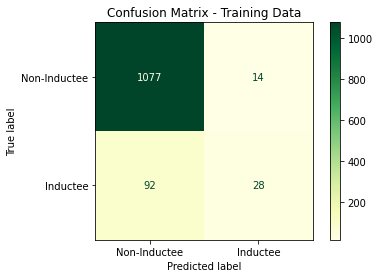

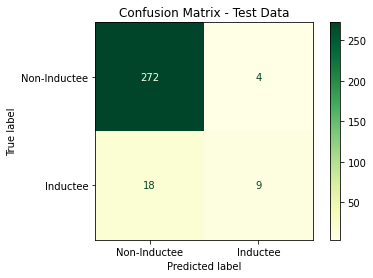

Accuracy of the model for training set: 0.912
Accuracy of the model for test set: 0.927

Precision of the model for training set: 0.667
Precision of the model for test set: 0.692

Recall of the model for training set: 0.233
Recall of the model for test set: 0.333

F1-measure of the model for training set: 0.346
F1-measure of the model for test set: 0.450



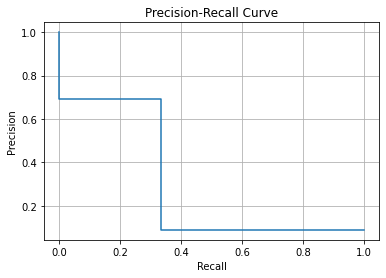

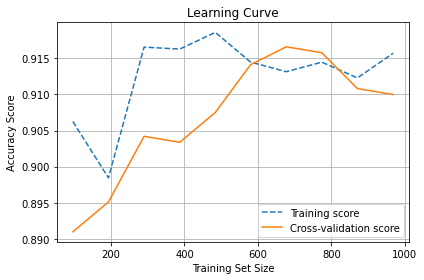

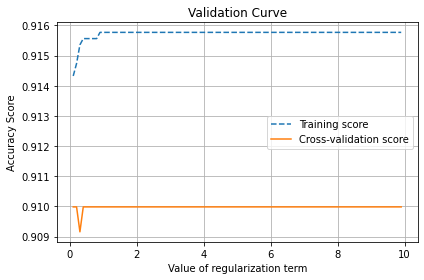

In [17]:
M2_clf = LogisticRegression(solver = 'newton-cg')
M2_clf.fit(X_train, y_train)

y_train_predict = M2_clf.predict(X_train)
y_test_predict = M2_clf.predict(X_test)

print("Model 2 (M2) Performance")


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# training
display = ConfusionMatrixDisplay.from_estimator(
    M2_clf,
    X_train,
    y_train,
    display_labels=['Non-Inductee', 'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Training Data")

plt.show()

# test
display = ConfusionMatrixDisplay.from_estimator(
    M2_clf,
    X_test,
    y_test,
    display_labels=['Non-Inductee', 'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Test Data")

plt.show()

from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train, y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test, y_test_predict))

from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train, y_train_predict))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test, y_test_predict))

from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train, y_train_predict))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test, y_test_predict))

from sklearn.metrics import f1_score
print('F1-measure of the model for training set: %.3f' % f1_score(y_train, y_train_predict))
print('F1-measure of the model for test set: %.3f\n' % f1_score(y_test, y_test_predict))

from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, y_test_predict)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    M2_clf, X_train, y_train, cv=5, scoring ='accuracy', train_sizes=np.linspace(.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean,  label="Cross-validation score")

plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


from sklearn.model_selection import validation_curve
param_range = np.arange(0.1,10,0.1)

train_scores, test_scores = validation_curve(
    M2_clf, X_train, y_train, param_name="C", param_range=param_range, cv=5, scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, '--',label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")

plt.grid()
plt.title("Validation Curve")
plt.xlabel("Value of regularization term")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Model 3 (M3): Logistic Regression with Feature Selection (determined using Random Forest)

In this particular instance, dimensionality reduction was not an improvement to our model.

Before giving up on this Hall of Fame idea entirely, let's take a different approach for reducing dimensionality and see what impact that might have.

#### Feature Selection

Let's try to improve the Recall results by reducing features in our model.

First, we'll create a Random Forest Classifier to help determine feature importance.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3 = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 42)


from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Next, we glean the importances from the forest classifier, first using a "Mean Decrease in Impurity" (or MDI) approach.

In [19]:
import numpy as np

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

Finally, we can examine feature importances visually.

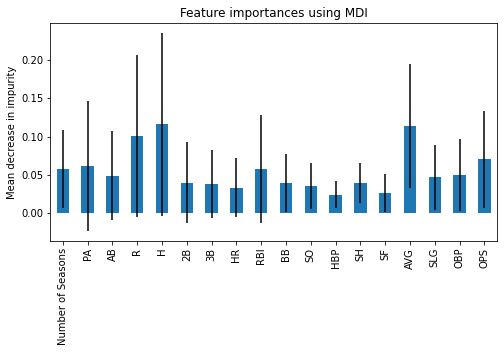

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


forest_importances = pd.Series(importances, index=X_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.set_figwidth(8)
fig.set_figheight(4)

By inspection, we can see that `'H'`, `'AVG'`, `'R'`, `'OPS'`, and `'PA'` are the top five features.


Let's look at importances in another way, using a "Permutation" approach.

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_features)

And then visualizing the results:

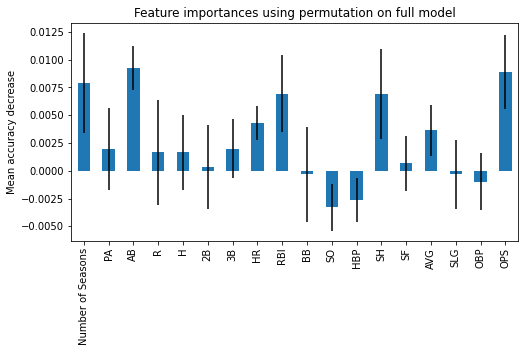

In [22]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")

fig.set_figwidth(8)
fig.set_figheight(4)

plt.show()

By inspection, here we find that `'AB'`, `'OPS'`, `'Number of Seasons'`, `'RBI'`, and `'SH'` are the top five features.

But, these are distinctly differnt lists with a lot of variance indicated in the graphs. Let's try manually simplifying the data by removing the calculated statistics from the feature data: `'AVG'`, `'SLG'`, `'OBP'`, and `'OPS'`. (All of these have meaning in terms of understanding aspects of a player's performance, but they are all calculated from features we already have so perhaps removal of this will help in some way.)

### Extraction of X, excluding the calculated statistics

In [23]:
num = pre_2000.shape[1]
X_nc = pre_2000[pre_2000.columns[2:num-5]]
X_nc

,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF
0,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120
1,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85
2,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30
3,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5
4,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31
1510,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81
1511,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20
1512,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14


In [24]:
X_nc_features = X_nc.columns.values.tolist()
X_nc_features

['Number of Seasons',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF']

In [25]:
X_nc = X_nc.values
X_nc

array([[   23, 13666, 12121, ...,    32,    21,   120],
       [   18, 10081,  8480, ...,    33,     7,    85],
       [   13,  4314,  4019, ...,    17,    41,    30],
       ...,
       [   11,  4361,  3940, ...,    24,     2,    20],
       [   12,  3523,  3218, ...,    13,    36,    14],
       [   13,  5737,  5144, ...,    12,     7,    41]])

And, for possible later use, let's also create a corresponding version of the data from the `from_2000` data.

In [26]:
num = from_2000.shape[1]
X_nc_2000 = from_2000[from_2000.columns[2:num-5]]
X_nc_2000_features = X_nc_2000.columns.values.tolist()
X_nc_2000 = X_nc_2000.values

Returning to the feature selection process, let's look at the `X_nc` data with respect to feature performances and see what we discover.

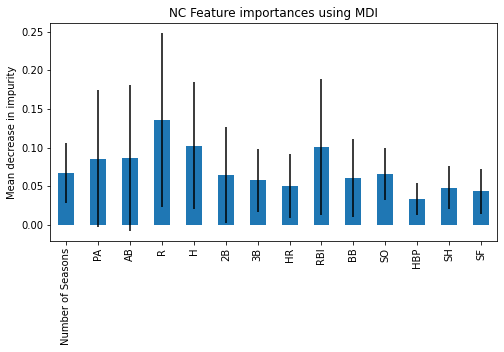

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3n = scaler.fit_transform(X_nc)

X_nc_train, X_nc_test, y_train, y_test = train_test_split(X3n, y, test_size = 0.2, random_state = 42)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_nc_train, y_train)

nc_importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_nc_importances = pd.Series(nc_importances, index=X_nc_features)

fig, ax = plt.subplots()
forest_nc_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("NC Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.set_figwidth(8)
fig.set_figheight(4)

plt.show()

By inspection, we can see that `'R'`, `'H'`, `'RBI'`, `'AB'`, and `'PA'` are the top five features.


Let's look at importances in another way, using a "Permutation" approach.

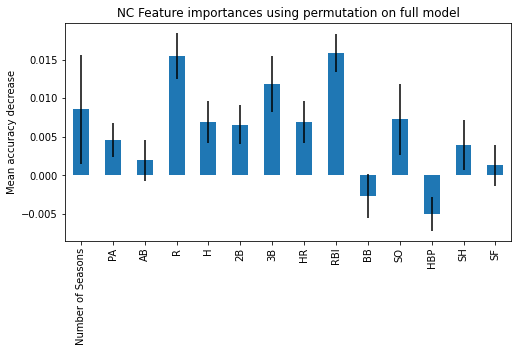

In [28]:
nc_result = permutation_importance(
    forest, X_nc_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_nc_importances = pd.Series(nc_result.importances_mean, index=X_nc_features)

fig, ax = plt.subplots()
forest_nc_importances.plot.bar(yerr=nc_result.importances_std, ax=ax)
ax.set_title("NC Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")

fig.set_figwidth(8)
fig.set_figheight(4)

plt.show()

Once again, by inspection, we find that `'RBI'`, `'R'`, `'3B'`, `'Number of Seasons'`, and `'SO'` are the top five features.

There's a bit more of a commonality between these two approaches of feature selection, but we'll look at the latter one, since the meaning of these five features are quite distinct and unlike one another.

We need to create a reduced version of X, which we'll call `X_reduced`.

In [29]:
X_reduced_features = ['RBI', 'R', '3B', 'Number of Seasons', 'SO']
X_reduced = pre_2000[X_reduced_features].values

And, let's grab `X_2000_reduced` for testing later on.

In [30]:
X_2000_reduced = from_2000[X_reduced_features].values

Model 3 (M3) Performance


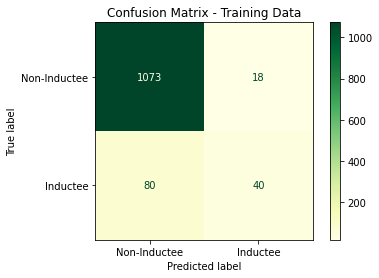

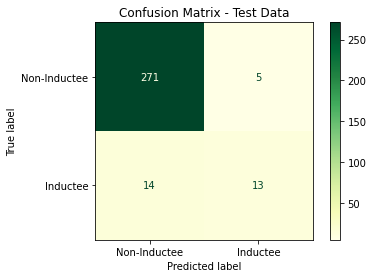

Accuracy of the model for training set: 0.919
Accuracy of the model for test set: 0.937

Precision of the model for training set: 0.690
Precision of the model for test set: 0.722

Recall of the model for training set: 0.333
Recall of the model for test set: 0.481

F1-measure of the model for training set: 0.449
F1-measure of the model for test set: 0.578



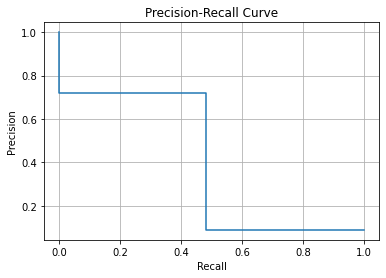

/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


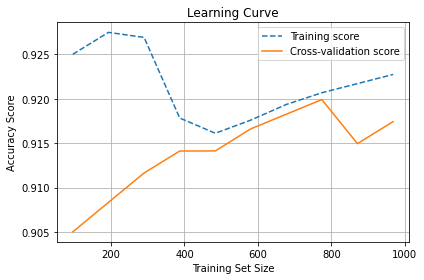

/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the lin

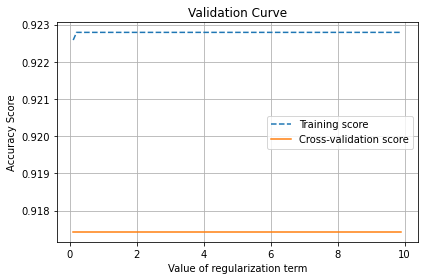

In [38]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X3nr = scaler.fit_transform(X_reduced)

X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

M3_clf = LogisticRegression(solver = 'newton-cg')
M3_clf.fit(X_reduced_train, y_train)

y_train_predict = M3_clf.predict(X_reduced_train)
y_test_predict = M3_clf.predict(X_reduced_test)

print("Model 3 (M3) Performance")


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# training
display = ConfusionMatrixDisplay.from_estimator(
    M3_clf,
    X_reduced_train,
    y_train,
    display_labels=['Non-Inductee', 'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Training Data")

plt.show()

# test
display = ConfusionMatrixDisplay.from_estimator(
    M3_clf,
    X_reduced_test,
    y_test,
    display_labels=['Non-Inductee', 'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Test Data")

plt.show()

from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train, y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test, y_test_predict))

from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train, y_train_predict))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test, y_test_predict))

from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train, y_train_predict))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test, y_test_predict))

from sklearn.metrics import f1_score
print('F1-measure of the model for training set: %.3f' % f1_score(y_train, y_train_predict))
print('F1-measure of the model for test set: %.3f\n' % f1_score(y_test, y_test_predict))

from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, y_test_predict)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    M3_clf, X_reduced_train, y_train, cv=5, scoring ='accuracy', train_sizes=np.linspace(.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean,  label="Cross-validation score")

plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


from sklearn.model_selection import validation_curve
param_range = np.arange(0.1,10,0.1)

train_scores, test_scores = validation_curve(
    M3_clf, X_reduced_train, y_train, param_name="C", param_range=param_range, cv=5, scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, '--',label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")

plt.grid()
plt.title("Validation Curve")
plt.xlabel("Value of regularization term")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Interesting??

In [39]:
print_hall_of_fame_predictions(M3_clf.predict(X_2000_reduced))

Albert Pujols


### Model 4 (M4): Support Vector Classifier (using the M3 Feature Selection)

Model 4 (M4) Performance


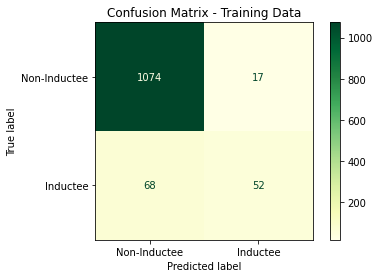

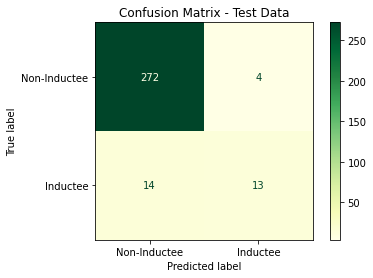

Accuracy of the model for training set: 0.930
Accuracy of the model for test set: 0.941

Precision of the model for training set: 0.754
Precision of the model for test set: 0.765

Recall of the model for training set: 0.433
Recall of the model for test set: 0.481

F1-measure of the model for training set: 0.550
F1-measure of the model for test set: 0.591



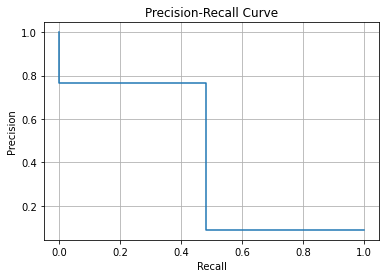

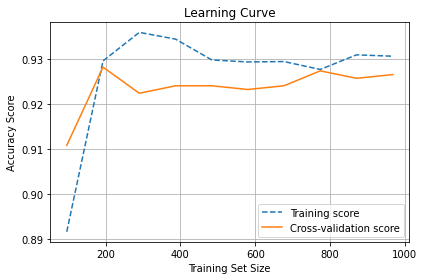

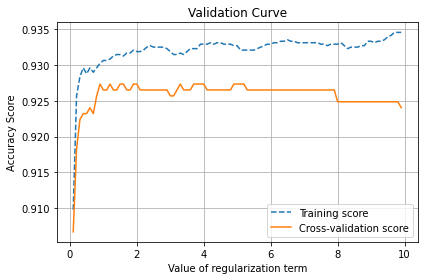

In [40]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X4 = scaler.fit_transform(X_reduced)

from sklearn import svm

X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# M4_clf = svm.SVC(kernel='linear')
M4_clf = svm.SVC()
M4_clf.fit(X_reduced_train, y_train)



y_train_predict = M4_clf.predict(X_reduced_train)
y_test_predict = M4_clf.predict(X_reduced_test)

print("Model 4 (M4) Performance")


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# training
display = ConfusionMatrixDisplay.from_estimator(
    M4_clf,
    X_reduced_train,
    y_train,
    display_labels=['Non-Inductee', 'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Training Data")

plt.show()

# test
display = ConfusionMatrixDisplay.from_estimator(
    M4_clf,
    X_reduced_test,
    y_test,
    display_labels=['Non-Inductee', 'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Test Data")

plt.show()

from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train, y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test, y_test_predict))

from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train, y_train_predict))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test, y_test_predict))

from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train, y_train_predict))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test, y_test_predict))

from sklearn.metrics import f1_score
print('F1-measure of the model for training set: %.3f' % f1_score(y_train, y_train_predict))
print('F1-measure of the model for test set: %.3f\n' % f1_score(y_test, y_test_predict))

from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, y_test_predict)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    M4_clf, X_reduced_train, y_train, cv=5, scoring ='accuracy', train_sizes=np.linspace(.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean,  label="Cross-validation score")

plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


from sklearn.model_selection import validation_curve
param_range = np.arange(0.1,10,0.1)

train_scores, test_scores = validation_curve(
    M4_clf, X_reduced_train, y_train, param_name="C", param_range=param_range, cv=5, scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, '--',label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")

plt.grid()
plt.title("Validation Curve")
plt.xlabel("Value of regularization term")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [41]:
print_hall_of_fame_predictions(M4_clf.predict(X_2000_reduced))

Miguel Cabrera
Albert Pujols


(1514, 14)

### M5 --- not reduced??

In [46]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X5 = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_nc, y, test_size = 0.2, random_state = 42)

from sklearn import svm
M5_clf = svm.SVC()
M5_clf.fit(X_train, y_train)

y_predicted_train = M5_clf.predict(X_train)
y_predicted_test = M5_clf.predict(X_test)



In [49]:
print_hall_of_fame_predictions(M5_clf.predict(X_nc_2000))

Miguel Cabrera
Albert Pujols
Ichiro Suzuki


### M6 --- not reduced?? still calculated

In [51]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X5 = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn import svm
M6_clf = svm.SVC()
M6_clf.fit(X_train, y_train)

y_predicted_train = M6_clf.predict(X_train)
y_predicted_test = M6_clf.predict(X_test)

In [52]:
print_hall_of_fame_predictions(M6_clf.predict(X_2000))

Miguel Cabrera
Albert Pujols
Ichiro Suzuki


### M7 KNN -X

In [53]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_knn = sc.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


from sklearn.neighbors import KNeighborsClassifier
M7_clf = KNeighborsClassifier(n_neighbors = 2)
M7_clf.fit(X_train, y_train)


# Predict both training and test data with the fitted model
y_train_predict = M7_clf.predict(X_train)
y_test_predict = M7_clf.predict(X_test)


In [54]:
print_hall_of_fame_predictions(M7_clf.predict(X_2000))

Albert Pujols


### M8 KNN -X_nc

In [63]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_knn = sc.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_nc, y, test_size = 0.2, random_state = 20)


from sklearn.neighbors import KNeighborsClassifier
M8_clf = KNeighborsClassifier(n_neighbors = 2)
M8_clf.fit(X_train, y_train)


# Predict both training and test data with the fitted model
y_train_predict = M8_clf.predict(X_train)
y_test_predict = M8_clf.predict(X_test)


In [64]:
print_hall_of_fame_predictions(M8_clf.predict(X_nc_2000))

Albert Pujols


### M9 KNN -X_reduced

In [58]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_knn = sc.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 20)


from sklearn.neighbors import KNeighborsClassifier
M9_clf = KNeighborsClassifier(n_neighbors = 2)
M9_clf.fit(X_train, y_train)


# Predict both training and test data with the fitted model
y_train_predict = M9_clf.predict(X_train)
y_test_predict = M9_clf.predict(X_test)


In [60]:
print_hall_of_fame_predictions(M9_clf.predict(X_2000_reduced))

Robinson Cano
Sandy Leon
Albert Pujols
